### Student Information
Name: 

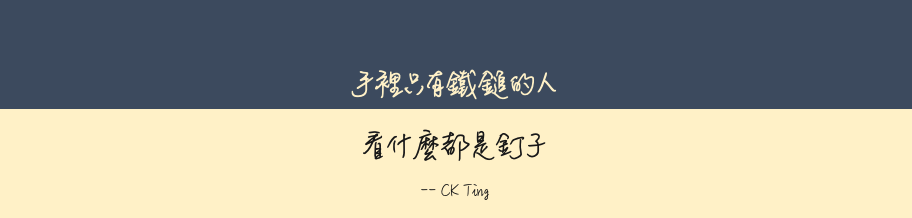
### Instruction

Instuctor: Winnie YH Zhao 
  
Welcome to NEAF DIP workshop! :)  
Here we prepare some widely used methods to let you practice, including:
1. Histogram Equalization
2. Mean blur, Median blur, Gaussian blur
3. Binary
4. HSV filter
5. Morphological: erosion, dilation, open, close
6. Find contours

Those skills are very powerful and important skills, please enjoy learning and put them into good use :)

## 1. Histogram Equalization
Histogram is the method to enhance image contrast.  
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.  
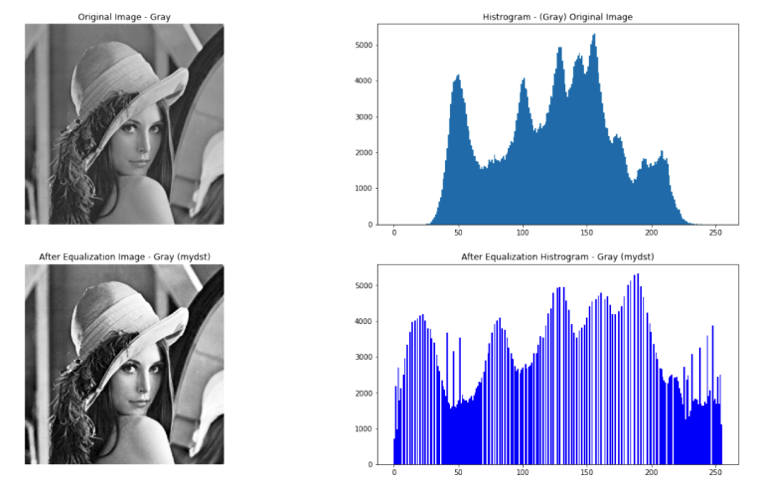

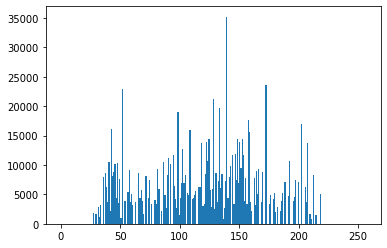

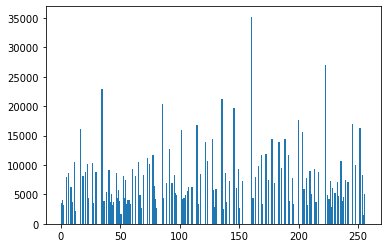

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_ori = cv2.imread('input/lena.bmp', cv2.IMREAD_GRAYSCALE) # Read image as gray.
img_equa=cv2.equalizeHist(img_ori)
plt.hist(img_ori.ravel(), 256, [0, 256])
plt.show()
plt.hist(img_equa.ravel(), 256, [0, 256])
plt.show()

# save figure
cv2.imwrite('output/img_ori.bmp', img_ori)
cv2.imwrite('output/img_equa.bmp', img_equa)






keywords: plt.hist, cv2.equalizeHist, cv2.calcHist

## 2. Mean blur, Gaussian blur, Median blur
Blur is a method to deal with the noise on the image.
Please input the image and use different kernel size to show blur result.
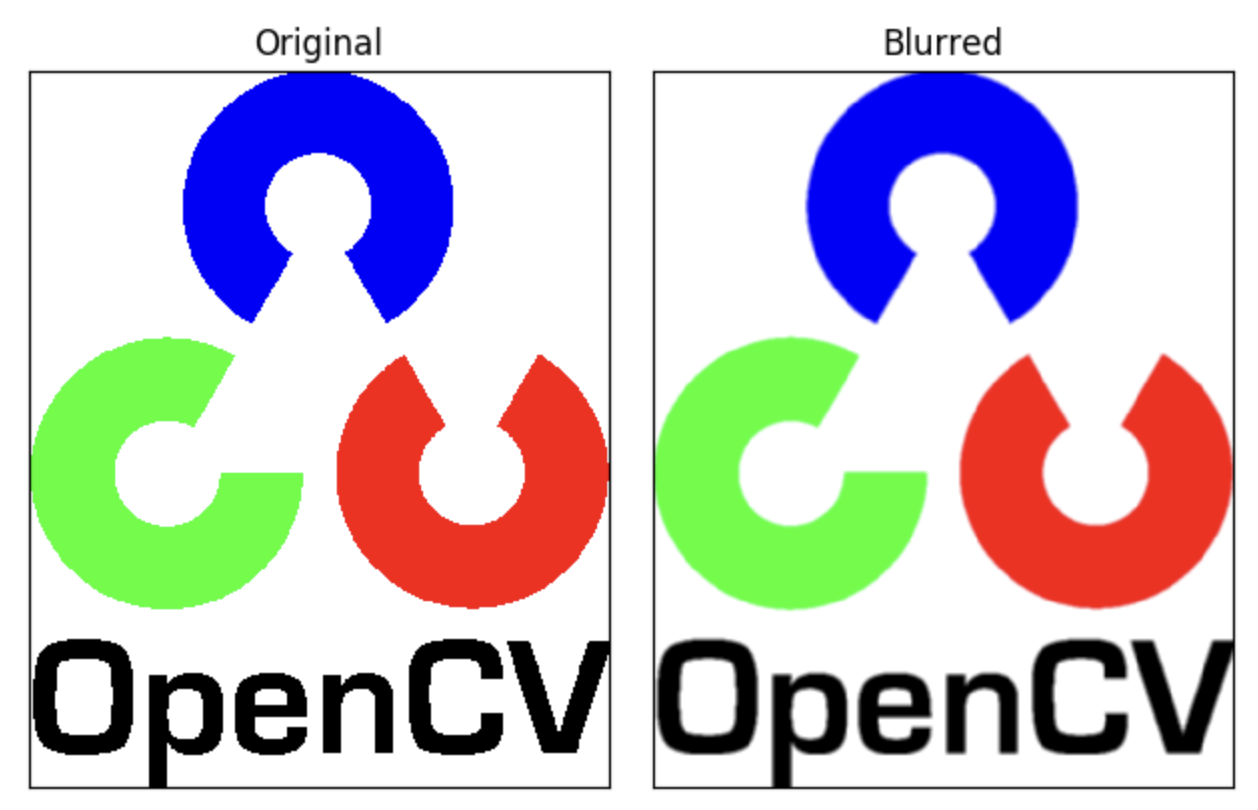
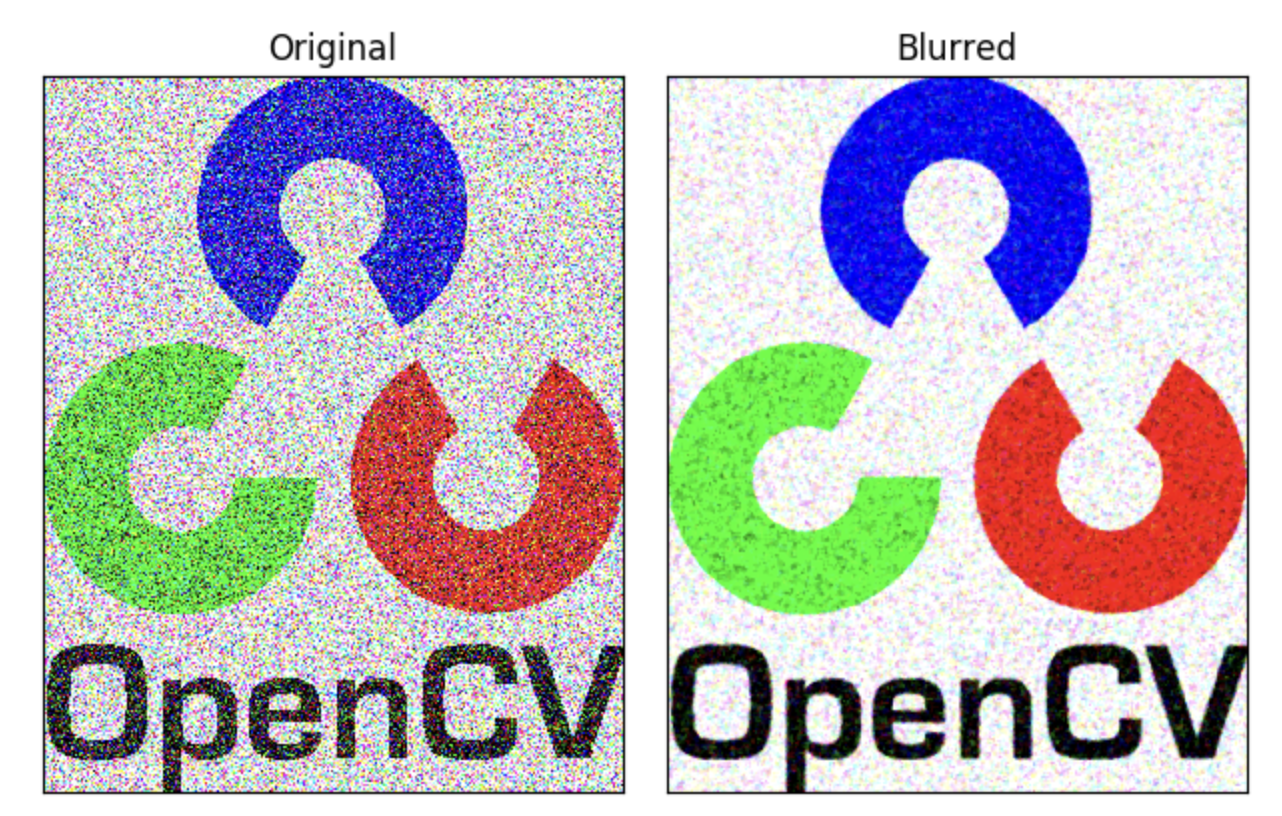

In [2]:
img_noise = cv2.imread('input/lena_noise.png', cv2.IMREAD_GRAYSCALE)

# Blur the image by three methods.
img_mean_blur=cv2.blur(img_noise,(3,3))
img_gaussian_blur=cv2.GaussianBlur(img_noise,(3,3),0)
img_median_blur=cv2.medianBlur(img_noise,3)

cv2.imwrite('output/img_mean_blur.png', img_mean_blur)
cv2.imwrite('output/img_gaussian_blur.png', img_gaussian_blur)
cv2.imwrite('output/img_median_blur.png', img_median_blur)

True

### Question:
1. What is the difference between three methods? When to use them?
2. What is the difference if the kernel size changes?  

keywords: cv2.blur, cv2.GaussianBlur, cv2.medianBlur

## 3. Binary
Binary is a method to transfer greyscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  
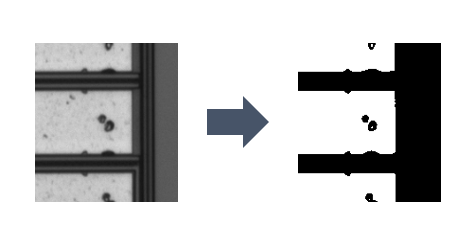

In [3]:
pad_task1 = cv2.imread('input/pad_task1.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background
ret, pad_task1_thres = cv2.threshold(pad_task1, 127, 255, cv2.THRESH_BINARY)

cv2.imwrite('output/pad_task1_thres.bmp', pad_task1_thres)

True

In [5]:
pad_task2 = cv2.imread('input/pad_task2.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background
ret, pad_task2_thres = cv2.threshold(pad_task2, 127, 255, cv2.THRESH_BINARY)


cv2.imwrite('output/pad_task2_thres.bmp', pad_task2_thres)

True

In [6]:
pad_task3 = cv2.imread('input/pad_task3.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background
ret, pad_task3_thres = cv2.threshold(pad_task3, 127, 255, cv2.THRESH_BINARY)

cv2.imwrite('output/pad_task3_thres.bmp', pad_task3_thres)

True

### Questions:
1. What are the limits of this methods?
2. What if the light source is not uniform? Is this method still work? How to improve it?  

keywords: cv2.threshold

## 4. HSV filter
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

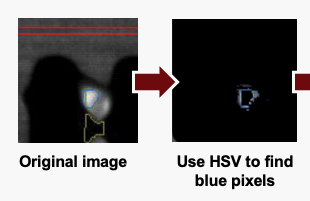
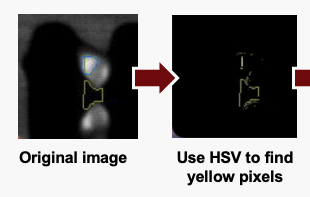

### Steps:
1. Transfer color to HSV.
2. Setting the color range and filter the image. (output the color image in the setting range)
3. Binary the image, find the left-top and right-bottom coordinate.
4. Crop the image by the coordinate.  

Noted: Blur, histogram equalization methods could be used if needed.  

3178 2536
3177 2537
41.0 150.0


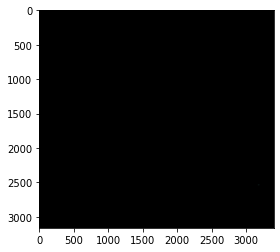

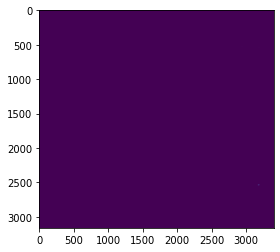

In [85]:
# Yellow box.
Fusheng_yellow = cv2.imread('input/Fusheng_yellow.jpg')

# Step 1. Transfer color to HSV
hsvimg=cv2.cvtColor(Fusheng_yellow,cv2.COLOR_BGR2HSV)

# Step 2. Setting the color range and filter the image.
l_yellow=np.array([25,43,46])
h_yellow=np.array([34,255,255])
mask=cv2.inRange(hsvimg,l_yellow,h_yellow)
result=cv2.bitwise_and(Fusheng_yellow,Fusheng_yellow,mask=mask)

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
gray = cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)
min_val, max_val,(x1,y1),(x2,y2) = cv2.minMaxLoc(gray,mask = mask)


# Step 4. Crop the image by the coordinate.
crop_edge = 20                                                                   # surrounding 20 pixels 
cropimg_yellow = result[y1-crop_edge: y2+crop_edge, x1-crop_edge: x2+crop_edge]   # take (x, y, w, h) as example.
plt.imshow(gray)
plt.show()
#cv2.imwrite('output/cropHSV_yellow.jpg', cropimg_yellow)

In [100]:
#blue box.
Fusheng_blue = cv2.imread('input/Fusheng_blue.jpg')

# Step 1. Transfer color to HSV
hsvimg=cv2.cvtColor(Fusheng_blue,cv2.COLOR_BGR2HSV)

# Step 2. Setting the color range and filter the image.
l_blue=np.array([100,43,46])
h_blue=np.array([124,255,255])
mask1=cv2.inRange(hsvimg,l_blue,h_blue)
result1=cv2.bitwise_and(Fusheng_blue,Fusheng_blue,mask=mask1)

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).

gray1 = cv2.cvtColor(hsvimg,cv2.COLOR_BGR2GRAY)
min_val, max_val,(x1,y1),(x2,y2) = cv2.minMaxLoc(gray1,mask = mask1)
print(x1,y1)
print(x2,y2)
print(min_val, max_val)


#Step 4. Crop the image by the coordinate.
crop_edge= 60                                                                 # surrounding 20 pixels 
crop_blue = result1 [2536-crop_edge: 2565+crop_edge,1322-crop_edge: 1347+crop_edge]   # take (x, y, w, h) as example.
cv2.imwrite('output/cropHSV_blue.jpg', crop_blue)


1347 2546
1322 2565
51.0 182.0


True

## 5. Morphological: erosion, dilation, open, close

Those methods help to denoise, enhance the features.   
Purpose: Use this methods to fill up the lines.
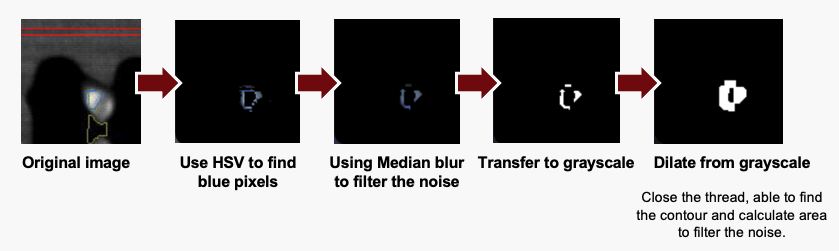

In [120]:
hsv_yellow = cv2.imread('output/cropHSV_yellow.jpg')

kernal=np.ones((3,3),np.uint8)
result=cv2.dilate(hsv_yellow,kernal,iterations=1)
# Try to use erosion, dilation, open, close to fill up the lines.

cv2.imwrite('output/morpho_yellow.jpg', result)

True

In [119]:
hsv_blue = cv2.imread('output/cropHSV_blue.jpg')
kernal=np.ones((3,3),np.uint8)
result=cv2.morphologyEx(hsv_blue,cv2.MORPH_DILATE,kernal)

# Try to use erosion, dilation, open, close to fill up the lines.


cv2.imwrite('output/morpho_blue.jpg', result)

True

keywords: cv2.erode, cv2.dilate, cv2.morpholopyEx

## 6. Find countours

Use package to find the contours in the image.
Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.
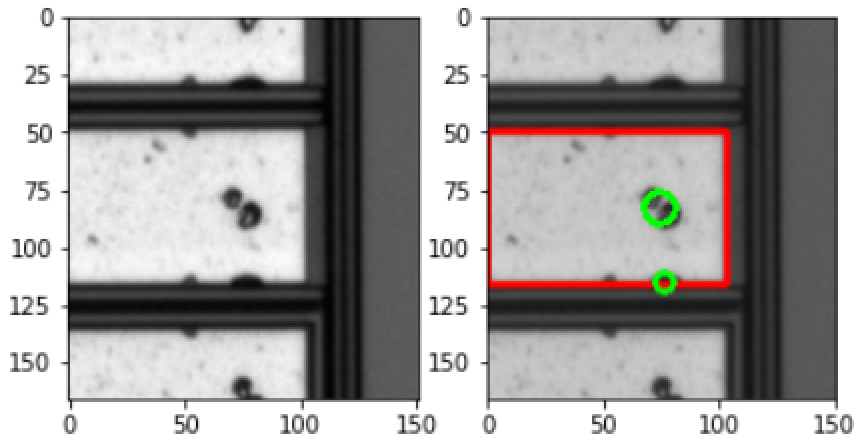

In [167]:
pad_task1 = cv2.imread('input/pad_task1.bmp', cv2.IMREAD_GRAYSCALE)
pad_task2 = cv2.imread('input/pad_task1.bmp')
ret,gray=cv2.threshold(pad_task1,127,255,cv2.THRESH_BINARY)
contours,step=cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

for j in contours:
    if cv2.contourArea(j)>200 and cv2.contourArea(j)<400:
        cv2.drawContours(pad_task2,j,-1,(0,255,255),2)
        probemark_area=cv2.contourArea(j)
    if cv2.contourArea(j)> 5000:
        cv2.drawContours(pad_task2,j,-1,(255,0,0),2)
        pad_area=cv2.contourArea(j)

result=pad_task1    
    



# Find the pad and probemark contours and draw.

cv2.imwrite('output/pad_task1_cont.bmp', result)
print('The pad area is ', pad_area)
print('The probe mark area is ', probemark_area)

The pad area is  6396.5
The probe mark area is  200.5


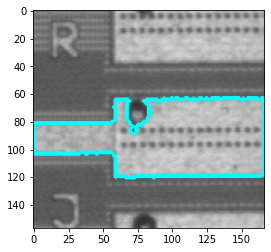

The pad area is  6952.5


In [183]:
pad_task2 = cv2.imread('input/pad_task2.bmp', cv2.IMREAD_GRAYSCALE)
pad_task3 = cv2.imread('input/pad_task2.bmp')
ret,gray=cv2.threshold(pad_task2,127,255,cv2.THRESH_BINARY)
contours,step=cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
for i in contours:
    if cv2.contourArea(i)>5000:
        cv2.drawContours(pad_task3,i,-1,(0,255,255),2)
        pad_area=cv2.contourArea(i)
result=pad_task3
plt.imshow(result)
plt.show()

# Find the pad and probemark contours and draw.

cv2.imwrite('output/pad_task2_cont.bmp', result)
print('The pad area is ', pad_area)
#print('The probe mark area is ', probemark_area)

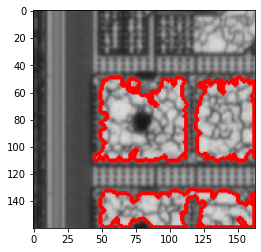

The pad area is  6952.5


In [191]:
pad_task3 = cv2.imread('input/pad_task3.bmp', cv2.IMREAD_GRAYSCALE)
pad_task4 = cv2.imread('input/pad_task3.bmp')
ret,gray=cv2.threshold(pad_task3,127,255,cv2.THRESH_BINARY)
contours,step=cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
a=[]
for j in contours:
        if cv2.contourArea(j)>2000 :
            cv2.drawContours(pad_task4,j,-1,(255,0,0),2)
            pad_arae+=cv2.contourArea(j)

result=pad_task4
plt.imshow(result)
plt.show()

# Find the pad and probemark contours and draw.

cv2.imwrite('output/pad_task3_cont.bmp', result)
print('The pad area is ', pad_area)
#print('The probe mark area is ', probemark_area)

keywords:  
cv2.findContours, cv2.contourArea